### Analysis of blood sugar data

Install necessary dependencies

In [25]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [26]:
df = pd.read_csv('interpolated.csv', parse_dates=[0])
date_time = df['Date-time']
df.set_index('Date-time', inplace=True)
display(df)


,Code,Value,Event
Date-time,,,
1988-03-27 08:00:00,58.0,134.0,Breakfast
1988-03-27 08:30:00,NaN,137.0,NaN
1988-03-27 09:00:00,NaN,140.0,NaN
1988-03-27 09:30:00,NaN,143.0,NaN
1988-03-27 10:00:00,NaN,146.0,NaN
...,...,...,...
1991-09-23 19:00:00,NaN,260.0,NaN
1991-09-23 19:30:00,NaN,259.0,NaN
1991-09-23 20:00:00,NaN,258.0,NaN


Plot of all interpolated data

<AxesSubplot:xlabel='Date-time'>

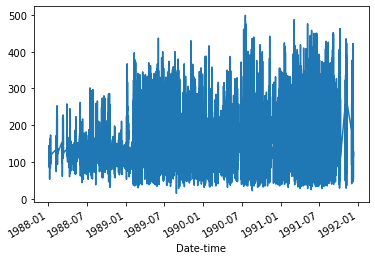

In [27]:
df['Value'].plot()

Last week of data

<AxesSubplot:xlabel='Date-time'>

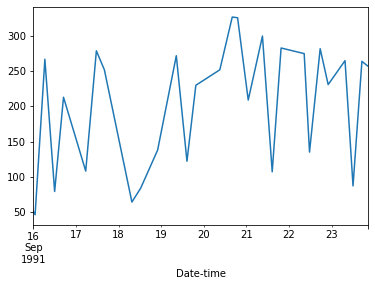

In [28]:
df['Value'][60848:-1].plot()

Last full day of data

<AxesSubplot:xlabel='Date-time'>

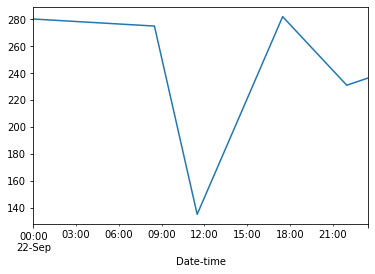

In [29]:
df['Value'][61136:61184].plot()

In [30]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Code,8821.0,58.164413,4.561983,48.0,58.0,59.500000,62.0,64.0
Value,61227.0,157.651853,59.292236,15.0,115.6,146.666667,193.0,499.0


Fast Fourier Transform to determine which frequencies are important

In [31]:
fft = tf.signal.rfft(df['Value'])
f_per_dataset = np.arange(0, len(fft))

n_samples_h = len(df['Value'])
hours_per_year = 24*365.2524
years_per_dataset = n_samples_h/(hours_per_year)

f_per_year = f_per_dataset/years_per_dataset

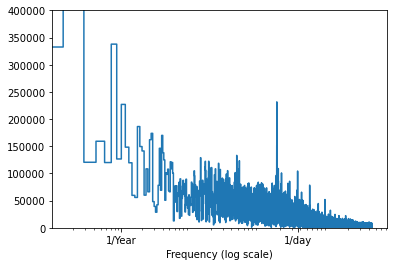

In [32]:
plt.step(f_per_year, np.abs(fft))
plt.xscale('log')
plt.ylim(0, 400000)

plt.xlim([0.1, max(plt.xlim())])
plt.xticks([1, 365.2524], labels=['1/Year', '1/day'])
plt.xlabel('Frequency (log scale)')
plt.show()
